In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
import tensorflow as tf
import random
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Train Data Import

## Importing CSV

In [24]:
train_data_verbose_df = pd.read_csv('/content/drive/Shareddrives/CS229_Final_Project_Data/Labeled_Data/Power/experimental_stuff/train_data_labeled_underperformance_binary_post2014.csv')
train_data_verbose_df

,Player Name,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,...,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,Label
0,Zach Collins,3.5,5.3,0.652,3.2,4.8,0.672,0.3,0.5,2.8,...,0.5,1.8,1.5,2.7,10.0,0.703,0.676,0.101,0.715,1
1,Malachi Flynn,4.3,10.6,0.406,2.1,4.5,0.473,2.2,6.1,2.0,...,1.1,0.0,2.1,1.9,12.8,0.544,0.509,0.577,0.234,0
2,Ty Jerome,4.8,11.1,0.435,2.7,5.7,0.469,2.1,5.4,1.8,...,1.5,0.0,1.6,1.7,13.6,0.555,0.532,0.484,0.222,0
3,Admiral Schofield,6.4,13.6,0.474,4.4,8.8,0.505,2.0,4.8,1.6,...,0.9,0.5,1.9,2.5,16.5,0.562,0.548,0.353,0.171,0
4,Marcus Paige,4.1,10.4,0.398,2.0,4.3,0.459,2.2,6.1,2.1,...,1.1,0.4,1.2,1.5,12.6,0.537,0.503,0.588,0.263,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,Cameron Johnson,4.6,9.6,0.484,4.6,9.6,0.484,0.0,0.0,3.7,...,0.8,0.6,2.3,3.5,12.9,0.527,0.484,0.000,0.599,0
253,DeAndre' Bembry,6.6,13.8,0.479,5.7,10.3,0.553,0.9,3.6,3.3,...,1.4,0.8,2.0,2.4,17.4,0.539,0.513,0.258,0.358,0
254,Markel Brown,5.6,11.8,0.473,4.0,7.6,0.525,1.6,4.3,4.4,...,1.0,1.0,1.6,2.5,17.2,0.591,0.541,0.361,0.483,0
255,Jaron Blossomgame,6.7,13.4,0.499,5.9,10.5,0.565,0.7,2.8,3.6,...,0.8,0.9,1.7,1.6,17.7,0.561,0.526,0.213,0.381,0


In [25]:
train_data_verbose_df.isnull().sum()

Player Name    0
FG             0
FGA            0
FG%            0
2P             0
2PA            0
2P%            0
3P             0
3PA            0
FT             0
FTA            0
FT%            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
TS%            0
eFG%           0
3PAr           0
FTr            0
Label          0
dtype: int64

## Imputing Missing Features

In [26]:
train_data_verbose_df_imputed = train_data_verbose_df.fillna(train_data_verbose_df.median())
train_data_verbose_df_imputed

<ipython-input-26-9437d93a5c5f>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data_verbose_df_imputed = train_data_verbose_df.fillna(train_data_verbose_df.median())


,Player Name,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,...,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,Label
0,Zach Collins,3.5,5.3,0.652,3.2,4.8,0.672,0.3,0.5,2.8,...,0.5,1.8,1.5,2.7,10.0,0.703,0.676,0.101,0.715,1
1,Malachi Flynn,4.3,10.6,0.406,2.1,4.5,0.473,2.2,6.1,2.0,...,1.1,0.0,2.1,1.9,12.8,0.544,0.509,0.577,0.234,0
2,Ty Jerome,4.8,11.1,0.435,2.7,5.7,0.469,2.1,5.4,1.8,...,1.5,0.0,1.6,1.7,13.6,0.555,0.532,0.484,0.222,0
3,Admiral Schofield,6.4,13.6,0.474,4.4,8.8,0.505,2.0,4.8,1.6,...,0.9,0.5,1.9,2.5,16.5,0.562,0.548,0.353,0.171,0
4,Marcus Paige,4.1,10.4,0.398,2.0,4.3,0.459,2.2,6.1,2.1,...,1.1,0.4,1.2,1.5,12.6,0.537,0.503,0.588,0.263,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,Cameron Johnson,4.6,9.6,0.484,4.6,9.6,0.484,0.0,0.0,3.7,...,0.8,0.6,2.3,3.5,12.9,0.527,0.484,0.000,0.599,0
253,DeAndre' Bembry,6.6,13.8,0.479,5.7,10.3,0.553,0.9,3.6,3.3,...,1.4,0.8,2.0,2.4,17.4,0.539,0.513,0.258,0.358,0
254,Markel Brown,5.6,11.8,0.473,4.0,7.6,0.525,1.6,4.3,4.4,...,1.0,1.0,1.6,2.5,17.2,0.591,0.541,0.361,0.483,0
255,Jaron Blossomgame,6.7,13.4,0.499,5.9,10.5,0.565,0.7,2.8,3.6,...,0.8,0.9,1.7,1.6,17.7,0.561,0.526,0.213,0.381,0


## Dropping Player Name


In [27]:
train_data_verbose_df_imputed = train_data_verbose_df_imputed.drop(['Player Name'], axis=1)
train_data_verbose_df_imputed

,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,FTA,...,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,Label
0,3.5,5.3,0.652,3.2,4.8,0.672,0.3,0.5,2.8,3.8,...,0.5,1.8,1.5,2.7,10.0,0.703,0.676,0.101,0.715,1
1,4.3,10.6,0.406,2.1,4.5,0.473,2.2,6.1,2.0,2.5,...,1.1,0.0,2.1,1.9,12.8,0.544,0.509,0.577,0.234,0
2,4.8,11.1,0.435,2.7,5.7,0.469,2.1,5.4,1.8,2.5,...,1.5,0.0,1.6,1.7,13.6,0.555,0.532,0.484,0.222,0
3,6.4,13.6,0.474,4.4,8.8,0.505,2.0,4.8,1.6,2.3,...,0.9,0.5,1.9,2.5,16.5,0.562,0.548,0.353,0.171,0
4,4.1,10.4,0.398,2.0,4.3,0.459,2.2,6.1,2.1,2.7,...,1.1,0.4,1.2,1.5,12.6,0.537,0.503,0.588,0.263,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,4.6,9.6,0.484,4.6,9.6,0.484,0.0,0.0,3.7,5.7,...,0.8,0.6,2.3,3.5,12.9,0.527,0.484,0.000,0.599,0
253,6.6,13.8,0.479,5.7,10.3,0.553,0.9,3.6,3.3,4.9,...,1.4,0.8,2.0,2.4,17.4,0.539,0.513,0.258,0.358,0
254,5.6,11.8,0.473,4.0,7.6,0.525,1.6,4.3,4.4,5.7,...,1.0,1.0,1.6,2.5,17.2,0.591,0.541,0.361,0.483,0
255,6.7,13.4,0.499,5.9,10.5,0.565,0.7,2.8,3.6,5.1,...,0.8,0.9,1.7,1.6,17.7,0.561,0.526,0.213,0.381,0


## Preprocess Features Matrix (X) and target vector (y)

In [28]:
X = train_data_verbose_df_imputed.drop(['Label'], axis=1).to_numpy()
y = train_data_verbose_df_imputed['Label'].to_numpy()

## Printing Correlation Matrix

<Axes: >

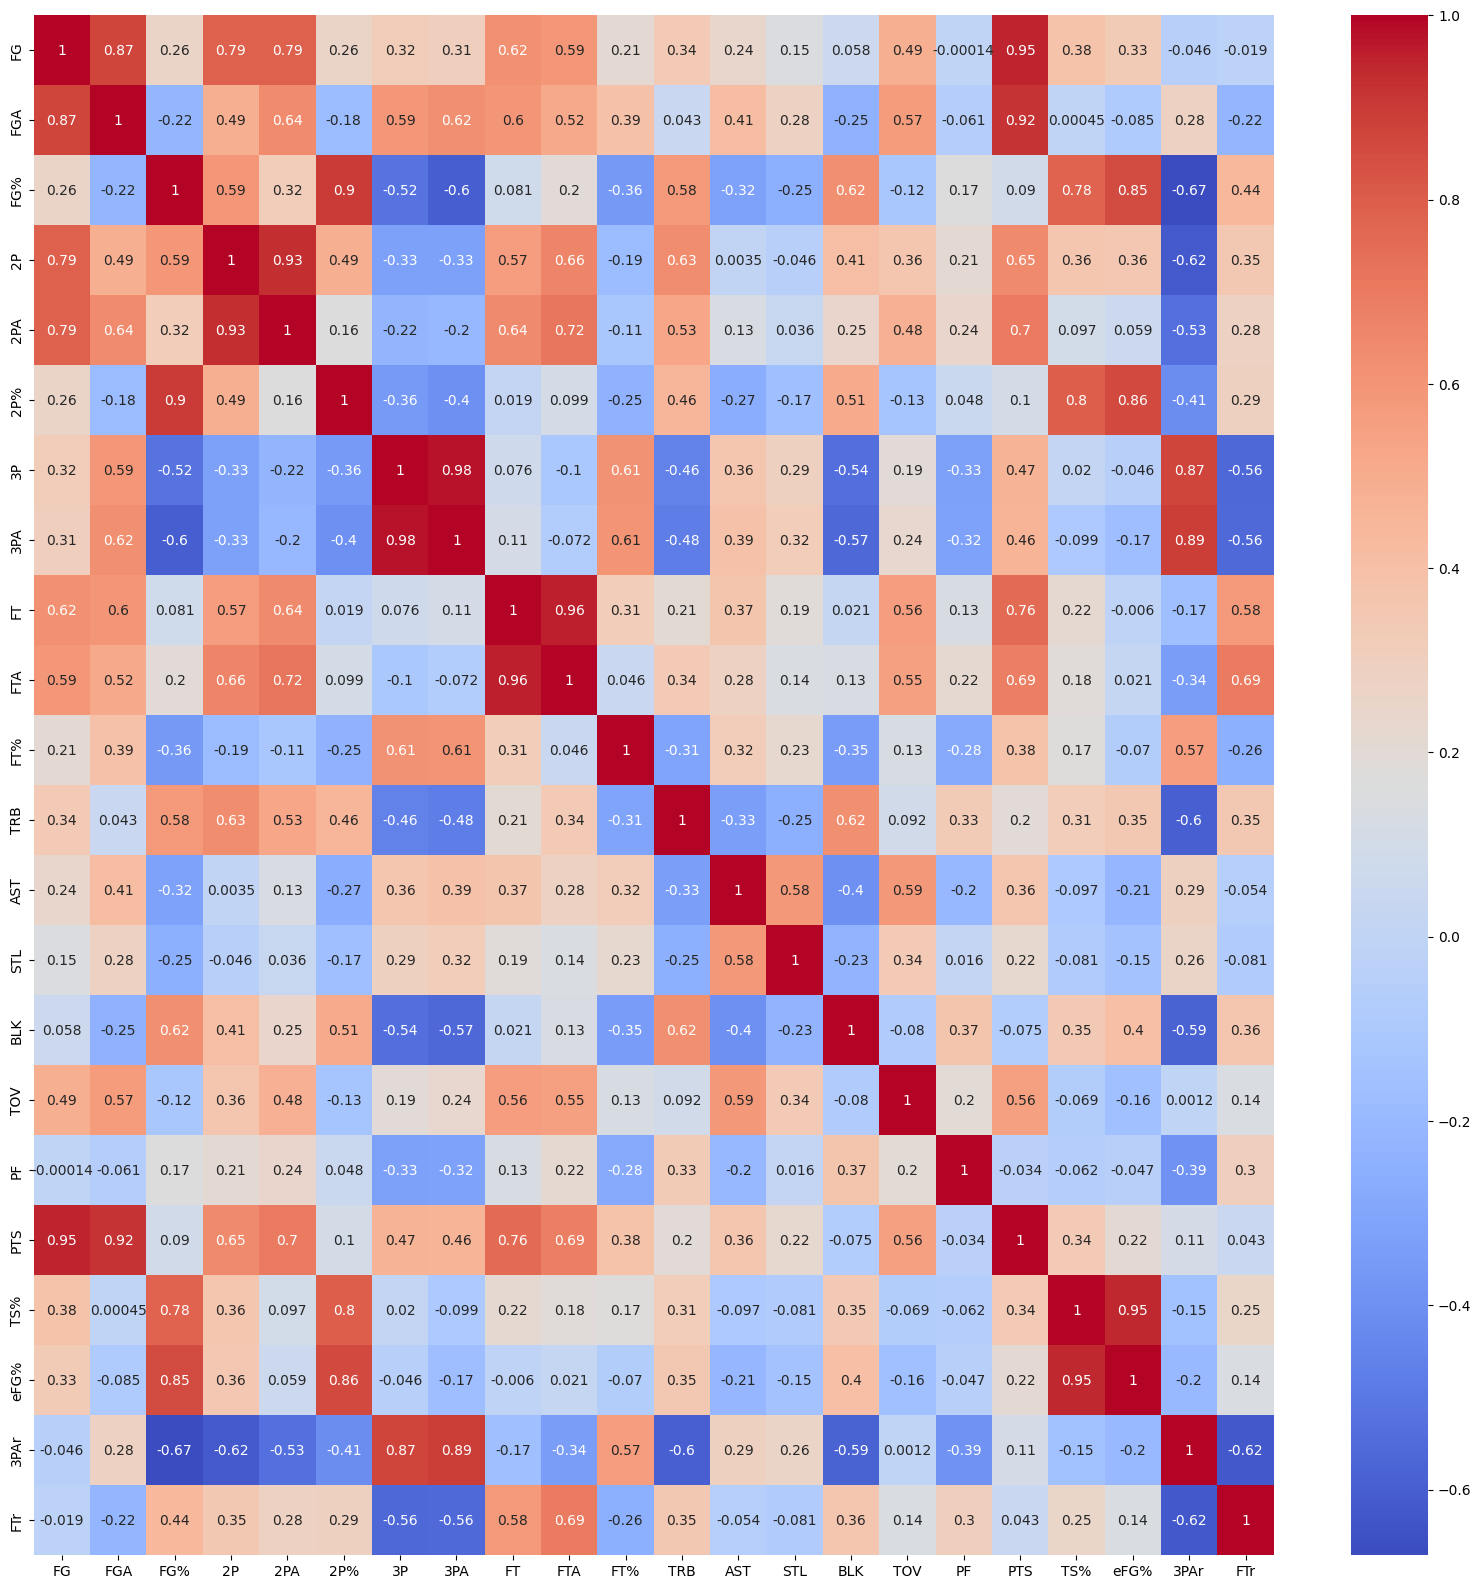

In [29]:
# create correlation matrix
corr_matrix = train_data_verbose_df_imputed.drop(['Label'], axis=1).corr()

plt.figure(figsize=(20,20))

# create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Test Data Import

## Importing CSV

In [30]:
test_data_verbose_df = pd.read_csv('/content/drive/Shareddrives/CS229_Final_Project_Data/Labeled_Data/Power/experimental_stuff/test_data_labeled_underperformance_binary_post2014.csv')
test_data_verbose_df

,Player Name,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,...,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,Label
0,Keita Bates-Diop,7.3,15.1,0.480,5.3,9.7,0.547,1.9,5.4,3.3,...,0.9,1.6,1.8,1.7,19.8,0.577,0.544,0.357,0.274,0
1,Lamar Patterson,5.6,12.7,0.441,3.4,7.0,0.484,2.2,5.7,3.7,...,1.4,0.3,2.6,2.0,17.1,0.569,0.528,0.450,0.382,0
2,Collin Sexton,5.9,13.3,0.447,4.6,9.3,0.495,1.3,4.0,5.9,...,0.8,0.1,2.8,2.5,19.2,0.567,0.498,0.299,0.575,1
3,Grant Riller,7.3,14.7,0.499,5.8,10.5,0.554,1.5,4.2,5.7,...,1.6,0.3,3.1,2.3,21.9,0.609,0.551,0.286,0.470,0
4,Keldon Johnson,4.6,10.1,0.461,3.4,6.9,0.498,1.2,3.2,2.9,...,0.8,0.2,1.6,2.2,13.5,0.558,0.521,0.316,0.416,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Monte Morris,6.2,13.3,0.465,4.6,9.2,0.503,1.5,4.1,2.5,...,1.5,0.3,1.2,1.5,16.4,0.555,0.523,0.308,0.239,0
61,OG Anunoby,4.3,7.6,0.557,3.4,4.8,0.701,0.9,2.8,1.7,...,1.3,1.3,1.6,2.1,11.1,0.611,0.615,0.369,0.393,0
62,Dylan Windler,7.4,13.6,0.540,4.3,6.6,0.659,3.0,7.1,3.5,...,1.4,0.6,2.1,2.1,21.3,0.681,0.651,0.518,0.304,0
63,Josh Christopher,5.1,11.7,0.432,3.9,7.8,0.496,1.2,3.9,2.9,...,1.5,0.5,1.7,3.2,14.3,0.529,0.483,0.335,0.313,0


In [31]:
test_data_verbose_df.isnull().sum()

Player Name    0
FG             0
FGA            0
FG%            0
2P             0
2PA            0
2P%            0
3P             0
3PA            0
FT             0
FTA            0
FT%            0
TRB            0
AST            0
STL            0
BLK            0
TOV            1
PF             1
PTS            0
TS%            0
eFG%           0
3PAr           0
FTr            0
Label          0
dtype: int64

## Imputing Missing Features

In [32]:
test_data_verbose_df_imputed = test_data_verbose_df.fillna(test_data_verbose_df.median())
test_data_verbose_df_imputed

<ipython-input-32-935c761ca987>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_data_verbose_df_imputed = test_data_verbose_df.fillna(test_data_verbose_df.median())


,Player Name,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,...,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,Label
0,Keita Bates-Diop,7.3,15.1,0.480,5.3,9.7,0.547,1.9,5.4,3.3,...,0.9,1.6,1.8,1.7,19.8,0.577,0.544,0.357,0.274,0
1,Lamar Patterson,5.6,12.7,0.441,3.4,7.0,0.484,2.2,5.7,3.7,...,1.4,0.3,2.6,2.0,17.1,0.569,0.528,0.450,0.382,0
2,Collin Sexton,5.9,13.3,0.447,4.6,9.3,0.495,1.3,4.0,5.9,...,0.8,0.1,2.8,2.5,19.2,0.567,0.498,0.299,0.575,1
3,Grant Riller,7.3,14.7,0.499,5.8,10.5,0.554,1.5,4.2,5.7,...,1.6,0.3,3.1,2.3,21.9,0.609,0.551,0.286,0.470,0
4,Keldon Johnson,4.6,10.1,0.461,3.4,6.9,0.498,1.2,3.2,2.9,...,0.8,0.2,1.6,2.2,13.5,0.558,0.521,0.316,0.416,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Monte Morris,6.2,13.3,0.465,4.6,9.2,0.503,1.5,4.1,2.5,...,1.5,0.3,1.2,1.5,16.4,0.555,0.523,0.308,0.239,0
61,OG Anunoby,4.3,7.6,0.557,3.4,4.8,0.701,0.9,2.8,1.7,...,1.3,1.3,1.6,2.1,11.1,0.611,0.615,0.369,0.393,0
62,Dylan Windler,7.4,13.6,0.540,4.3,6.6,0.659,3.0,7.1,3.5,...,1.4,0.6,2.1,2.1,21.3,0.681,0.651,0.518,0.304,0
63,Josh Christopher,5.1,11.7,0.432,3.9,7.8,0.496,1.2,3.9,2.9,...,1.5,0.5,1.7,3.2,14.3,0.529,0.483,0.335,0.313,0


## Dropping Player Name


In [33]:
test_data_verbose_df_imputed = test_data_verbose_df_imputed.drop(['Player Name'], axis=1)
test_data_verbose_df_imputed

,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,FTA,...,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,Label
0,7.3,15.1,0.480,5.3,9.7,0.547,1.9,5.4,3.3,4.1,...,0.9,1.6,1.8,1.7,19.8,0.577,0.544,0.357,0.274,0
1,5.6,12.7,0.441,3.4,7.0,0.484,2.2,5.7,3.7,4.9,...,1.4,0.3,2.6,2.0,17.1,0.569,0.528,0.450,0.382,0
2,5.9,13.3,0.447,4.6,9.3,0.495,1.3,4.0,5.9,7.6,...,0.8,0.1,2.8,2.5,19.2,0.567,0.498,0.299,0.575,1
3,7.3,14.7,0.499,5.8,10.5,0.554,1.5,4.2,5.7,6.9,...,1.6,0.3,3.1,2.3,21.9,0.609,0.551,0.286,0.470,0
4,4.6,10.1,0.461,3.4,6.9,0.498,1.2,3.2,2.9,4.2,...,0.8,0.2,1.6,2.2,13.5,0.558,0.521,0.316,0.416,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,6.2,13.3,0.465,4.6,9.2,0.503,1.5,4.1,2.5,3.2,...,1.5,0.3,1.2,1.5,16.4,0.555,0.523,0.308,0.239,0
61,4.3,7.6,0.557,3.4,4.8,0.701,0.9,2.8,1.7,3.0,...,1.3,1.3,1.6,2.1,11.1,0.611,0.615,0.369,0.393,0
62,7.4,13.6,0.540,4.3,6.6,0.659,3.0,7.1,3.5,4.2,...,1.4,0.6,2.1,2.1,21.3,0.681,0.651,0.518,0.304,0
63,5.1,11.7,0.432,3.9,7.8,0.496,1.2,3.9,2.9,3.7,...,1.5,0.5,1.7,3.2,14.3,0.529,0.483,0.335,0.313,0


## Preprocess Features Matrix (X) and target vector (y)

In [34]:
X_test = test_data_verbose_df_imputed.drop(['Label'], axis=1).to_numpy()
y_test = test_data_verbose_df_imputed['Label'].to_numpy()

# Computing Model Performance Baselines




In [35]:
from sklearn.metrics import f1_score, recall_score, precision_score, average_precision_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import StratifiedKFold

## Train Baseline:

1.   run 3 Fold CV
2.   simulate the model predicting on that fold's validation data 1000 times

In [36]:
np.unique(y, return_counts=True)

(array([0, 1]), array([192,  65]))

In [37]:
"""
f1_baseline_list = []
precision_baseline_list = []
recall_baseline_list = []
"""

auc_pr_list_stratified = []
auc_pr_list_constant = []

num_iters = 5000

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Loop over the folds
for train_index, test_index in tqdm(skf.split(X, y)):

  # Split the data into training and testing sets
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  for _ in range(num_iters):

    # Create a dummy classifier that always predicts the most frequent class
    dummy = DummyClassifier(strategy='stratified') 

    # Fit the dummy classifier to the training data
    dummy.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = dummy.predict_proba(X_test)[:, 1]

    """
    f1_baseline_list.append(f1_score(y_test, y_pred))
    precision_baseline_list.append(precision_score(y_test, y_pred))
    recall_baseline_list.append(recall_score(y_test, y_pred))
    """
    auc_pr_list_stratified.append(average_precision_score(y_test, y_pred))
    auc_pr_list_constant.append(average_precision_score(y_test, [1 for _ in range(len(y_test))]))

print('\n')
"""
print(f'Mean F1 of Dummy Baseline Classifier: {np.mean(f1_baseline_list)}')
print(f'Mean Precision of Dummy Baseline Classifier: {np.mean(precision_baseline_list)}')
print(f'Mean Recall of Dummy Baseline Classifier: {np.mean(recall_baseline_list)}')
"""
print(f'Mean AUCPR (Stratified): {np.mean(auc_pr_list_stratified)}')
print(f'Mean AUCPR (Constant): {np.mean(auc_pr_list_constant)}')

3it [00:22,  7.39s/it]



Mean AUCPR (Stratified): 0.25949238743038694
Mean AUCPR (Constant): 0.2528955768353853


## Test Baseline

In [38]:
# Create a dummy classifier that always predicts the most frequent class
dummy = DummyClassifier(strategy='stratified') 

# Fit the dummy classifier to the training data
dummy.fit(X_test, y_test)

# Make predictions on the testing data
y_pred = dummy.predict_proba(X_test)[:, 1]

print(f'AUCPR (Stratified): {average_precision_score(y_test, y_pred)}')
print(f'AUCPR (Constant): {average_precision_score(y_test, [1 for _ in range(len(y_test))])}')

AUCPR (Stratified): 0.262640056022409
AUCPR (Constant): 0.24705882352941178


# Applying Classical ML Models to NCAA Features Dataset

1.   SVM
2.   Logistic Regression

## SVM




In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import make_scorer, average_precision_score
from sklearn.decomposition import PCA

### Cross Validation

In [40]:
# Create a stratified k-fold object
num_folds = 3

skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

fold_count = 0

f1_list = []
precision_list = []
recall_list = []
auc_pr_list = []

# Loop over the folds
for train_index, test_index in tqdm(skf.split(X, y)):

  fold_count+=1
  print(f'Training on Fold {fold_count}/{num_folds}')

  #init std scaler to transform univariate features ~N(0,1)
  scaler = StandardScaler()

  # Split the data into training and testing sets
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # normalizing univarate features in X_train/X_test
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  
  #running pca
  num_components = 17
  pca = PCA(n_components=num_components)
  pca.fit(X_train)
  X_train = pca.transform(X_train)
  X_test = pca.transform(X_test)
  
  # Train an SVM model on the training data
  svm = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
  svm.fit(X_train, y_train)

  # Make predictions on the testing data
  probs = svm.predict_proba(X_test)[:, 1]

  """
  y_pred = (probs >= 0.275).astype(int)
  f1 = f1_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  
  #update metric lists
  f1_list.append(f1)
  precision_list.append(precision)
  recall_list.append(recall)
  """

  auc_pr_list.append(average_precision_score(y_test, probs))

  """
  report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose().drop(columns=['support']).drop(['accuracy', 'macro avg','weighted avg'])

    # Print the results
  print('Classificaiton Report: \n')
  sns.heatmap(report_df, annot=True)
  plt.show()
  print('\n')
  """

"""
print(f'Mean F1: {np.mean(f1_list)}')
print(f'Mean Precision: {np.mean(precision_list)}')
print(f'Mean Recall: {np.mean(recall_list)}')
"""
print(f'Mean AUCPR: {np.mean(auc_pr_list)}')

3it [00:00, 38.65it/s]

Training on Fold 1/3
Training on Fold 2/3
Training on Fold 3/3
Mean AUCPR: 0.3037511401874233


## Logistic Regression Model





In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

## Cross Validation

In [42]:
# Create a stratified k-fold object
num_folds = 3

skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

fold_count = 0

f1_list = []
precision_list = []
recall_list = []
auc_pr_list = []

# Loop over the folds
for train_index, test_index in tqdm(skf.split(X, y)):

  fold_count+=1
  print(f'Training on Fold {fold_count}/{num_folds}')

  #init std scaler to transform univariate features ~N(0,1)
  scaler = StandardScaler()

  # Split the data into training and testing sets
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # normalizing univarate features in X_train/X_test
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  
  #running pca
  num_components = 17
  pca = PCA(n_components=num_components)
  pca.fit(X_train)
  X_train = pca.transform(X_train)
  X_test = pca.transform(X_test)
  
  # Create a logistic regression object with L2 regularization
  lr = LogisticRegression(penalty='l2', class_weight='balanced')

  # Fit the model to the training data
  lr.fit(X_train, y_train)

  # Make predictions on the testing data
  probs = lr.predict_proba(X_test)[:, 1]

  """
  y_pred = (probs >= 0.5).astype(int)
  f1 = f1_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  
  #update metric lists
  f1_list.append(f1)
  precision_list.append(precision)
  recall_list.append(recall)

  report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose().drop(columns=['support']).drop(['accuracy', 'macro avg','weighted avg'])

    # Print the results
  print('Classificaiton Report: \n')
  sns.heatmap(report_df, annot=True)
  plt.show()
  print('\n')
  """

  auc_pr_list.append(average_precision_score(y_test, probs))

"""
print(f'Mean F1: {np.mean(f1_list)}')
print(f'Mean Precision: {np.mean(precision_list)}')
print(f'Mean Recall: {np.mean(recall_list)}')
"""

print(f'Mean AUCPR: {np.mean(auc_pr_list)}')

0it [00:00, ?it/s]

Training on Fold 1/3
Training on Fold 2/3
Training on Fold 3/3


3it [00:00, 52.71it/s]

Mean AUCPR: 0.36573587037791744
